In [1]:
import scanpy as sc

In [2]:
adata = sc.read('../../CardiacCompendium/Data/human/Lundeberg/scanpy/spatialTran_ST.h5ad')

In [3]:
adata.obsm['spatial'] = adata.obs[['new_x', 'new_y']]

In [4]:
adata.obs.head()

,nGene,nUMI,Sample,weeks,ChipBatch,ChipNr,Experiment_date,Experiment_procedure,Sequencing_date,Raw_reads,new_x,new_y,percent.mito,res.0.8,nCount_SCT,nFeature_SCT
index,,,,,,,,,,,,,,,,
1x17x20FH5_1000L3_CN20_C1_,666,1046,FH5_1000L3_CN20_C1,5,1000L3,CN20,151105,manual,151117,35432474,16.92,19.99,0.018164,0,2555,765
1x17x21FH5_1000L3_CN20_C1_,891,1361,FH5_1000L3_CN20_C1,5,1000L3,CN20,151105,manual,151117,35432474,17.06,20.95,0.007348,0,2825,936
1x17x22FH5_1000L3_CN20_C1_,1138,1878,FH5_1000L3_CN20_C1,5,1000L3,CN20,151105,manual,151117,35432474,17.02,22.02,0.007455,0,2779,1149
1x18x18FH5_1000L3_CN20_C1_,766,1170,FH5_1000L3_CN20_C1,5,1000L3,CN20,151105,manual,151117,35432474,17.99,18.00,0.021368,3,2649,828
1x18x19FH5_1000L3_CN20_C1_,536,820,FH5_1000L3_CN20_C1,5,1000L3,CN20,151105,manual,151117,35432474,17.95,18.99,0.014634,1,2436,687


In [5]:
len(set(adata.obs['Sample'].tolist()))

19

In [9]:
adata[adata.obs['Sample'].isin(['FH6_1000L2_CN74_D1'])]

View of AnnData object with n_obs × n_vars = 178 × 14014
    obs: 'nGene', 'nUMI', 'Sample', 'weeks', 'ChipBatch', 'ChipNr', 'Experiment_date', 'Experiment_procedure', 'Sequencing_date', 'Raw_reads', 'new_x', 'new_y', 'percent.mito', 'res.0.8', 'nCount_SCT', 'nFeature_SCT'
    var: 'sct.detection_rate', 'sct.gmean', 'sct.variance', 'sct.residual_mean', 'sct.residual_variance', 'sct.variable'
    obsm: 'spatial'
    layers: 'logcounts'

In [7]:
adata[adata.obs['Sample'].isin(['FH6_1000L2_CN74_D1'])].X

<178x14014 sparse matrix of type '<class 'numpy.float32'>'
	with 315149 stored elements in Compressed Sparse Row format>

In [10]:
adata[adata.obs['Sample'].isin(['FH6_1000L2_CN74_D1'])].write('../data/asp/FH6_1000L2_CN74_D1.h5ad')

6FH6_1000L2_CN74_D1


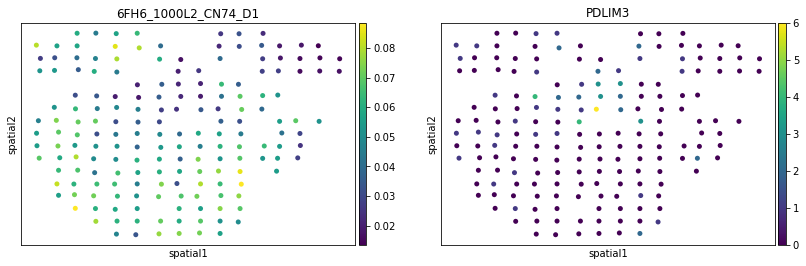

6FH6_1000L2_CN74_D2


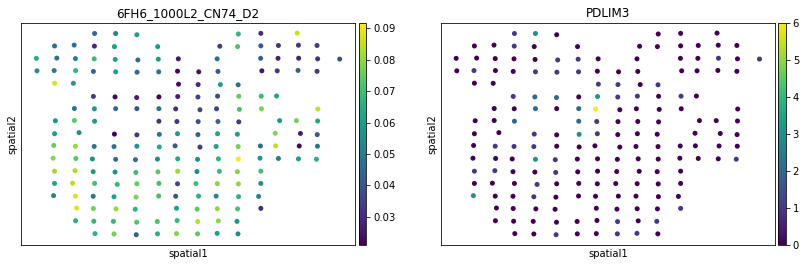

6FH6_1000L2_CN73_C2


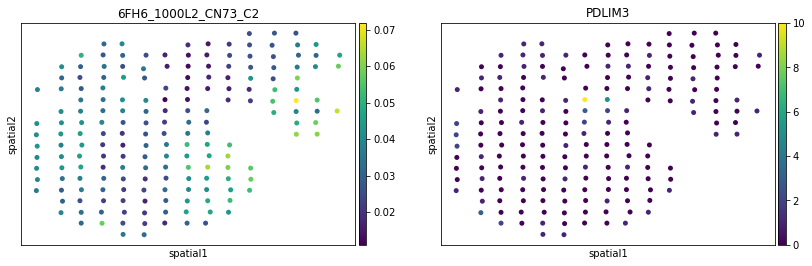

6FH6_1000L2_CN74_C1


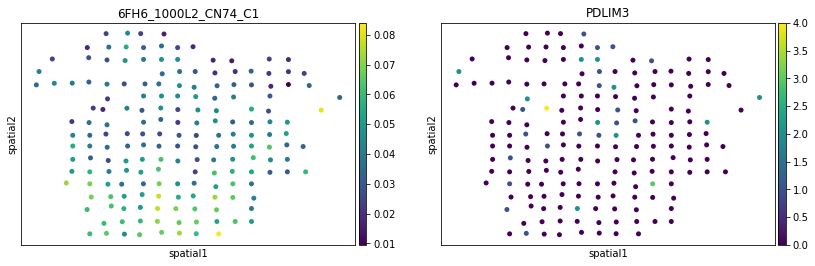

9FH9_1000L3_CN31_C2


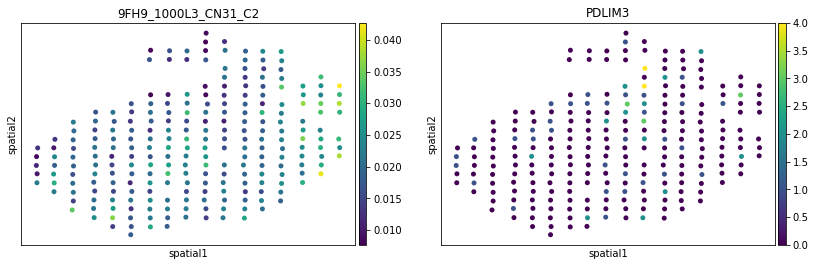

6FH6_1000L2_CN74_E1


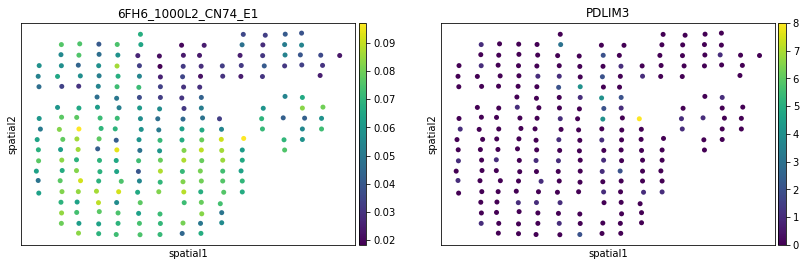

6FH6_1000L2_CN74_E2


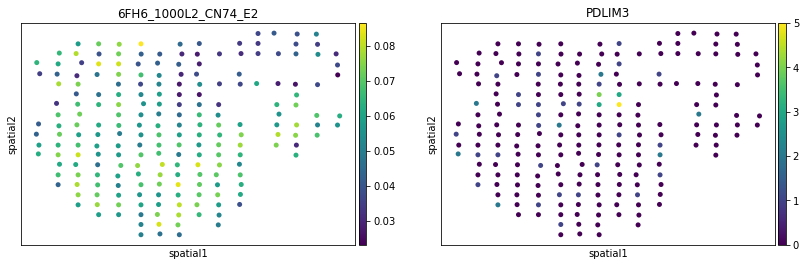

9FH9_1000L3_CN31_D1


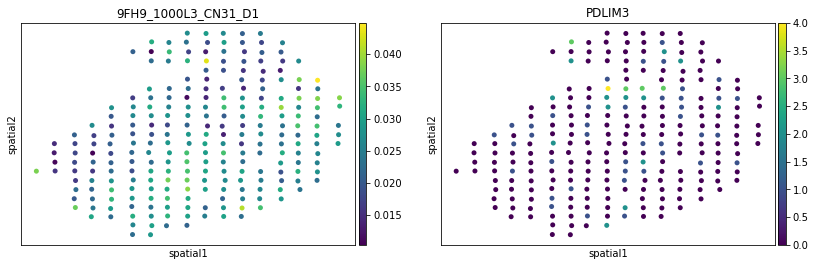

9FH9_1000L3_CN31_E1


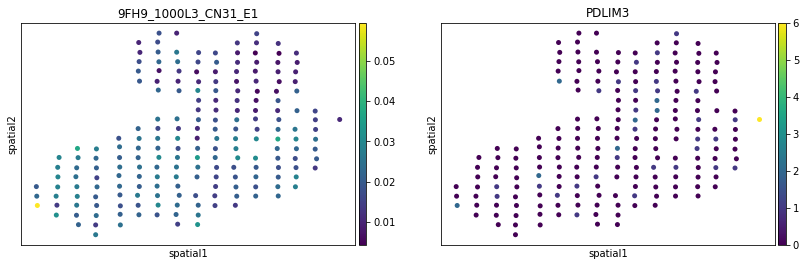

9FH9_1000L3_CN31_C1


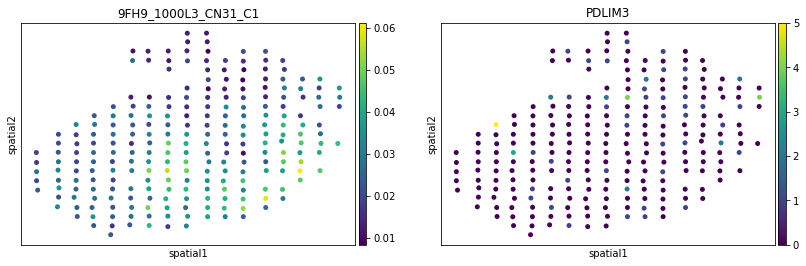

9FH9_1000L3_CN31_D2


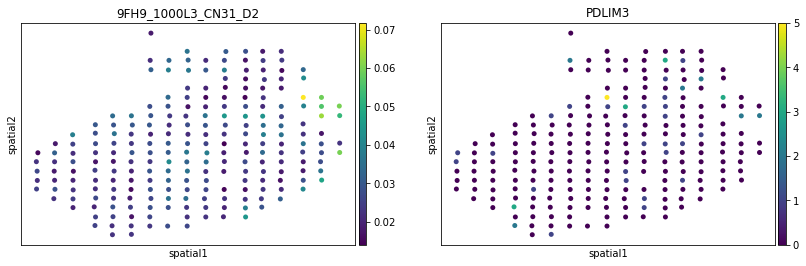

6FH6_1000L2_CN73_D2


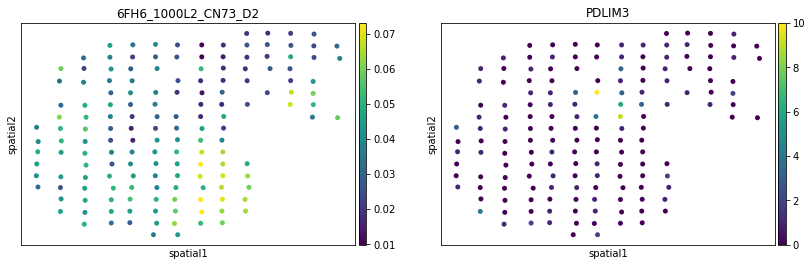

5FH5_1000L3_CN20_C2


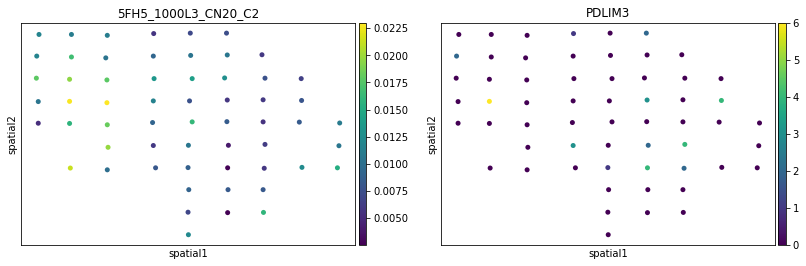

5FH5_1000L3_CN20_D1


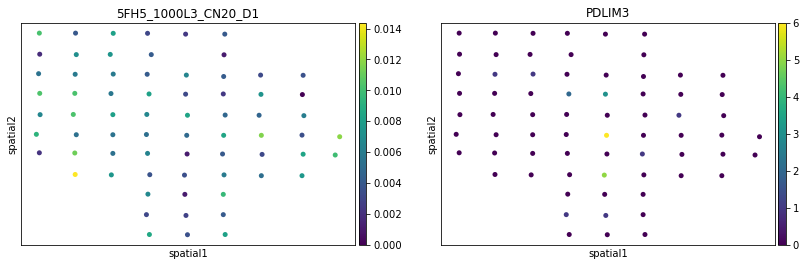

9FH9_1000L3_CN31_E2


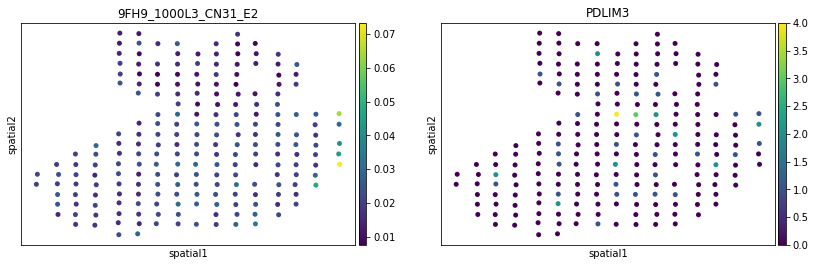

6FH6_1000L2_CN73_E1


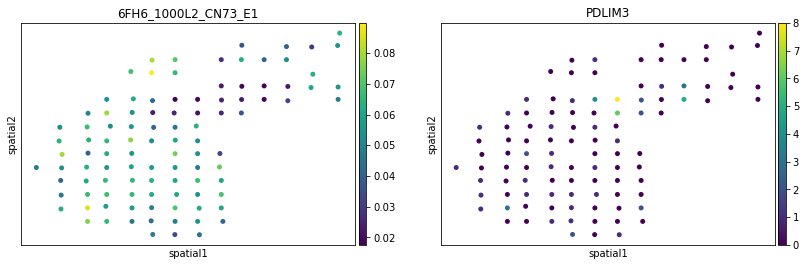

6FH6_1000L2_CN73_E2


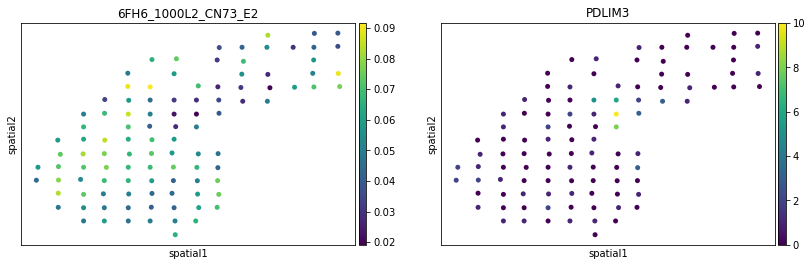

5FH5_1000L3_CN20_C1


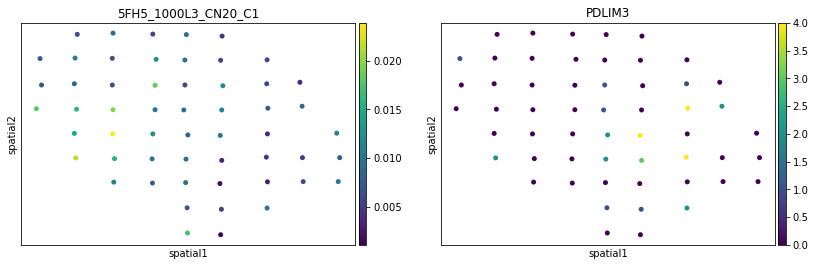

5FH5_1000L3_CN20_D2


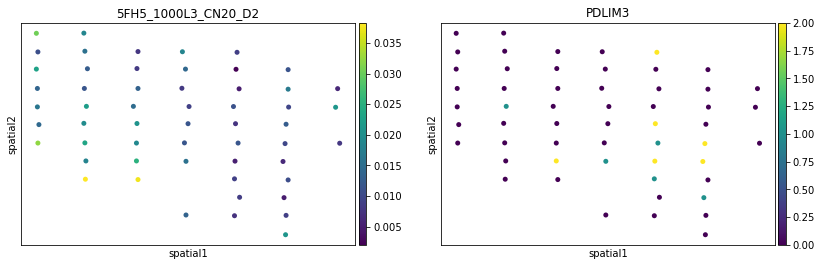

In [8]:
for sample in list(set(adata.obs['Sample'].tolist())):
    temp_adata = adata[adata.obs['Sample'].isin([sample])]
    temp_adata.obsm['spatial'] = temp_adata.obs[['new_x', 'new_y']]
    title = str(temp_adata.obs['weeks'].tolist()[0]) + str(temp_adata.obs['Sample'].tolist()[0]) 
    print(title)
    sc.pl.embedding(temp_adata, color=['percent.mito', 'PDLIM3'], basis='spatial', title=title, size=100)